In [2]:
''' 
single_gene_violin_plots.ipynb 
By Natalie Bratset
'''
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mplpatches
import matplotlib.pyplot as plt

phenotype_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/new_data/first400_comorbid_df.csv")
# phenotype_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/new_data/first400_express_values_chr21_df.csv") #just chr21
expression_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/new_data/first400_express_values_df.csv")
gene_ref_path = os.path.expanduser("/scratch/Shares/dowell/temp/ChrisO/PSEA/AREA/testdata/genes.csv")

phenotype_data = pd.read_csv(phenotype_path)
expression_data = pd.read_csv(expression_path)
gene_ref = pd.read_csv(gene_ref_path)

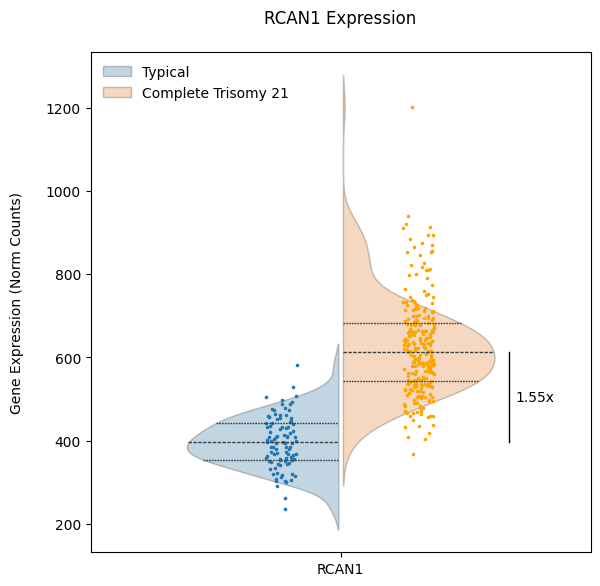

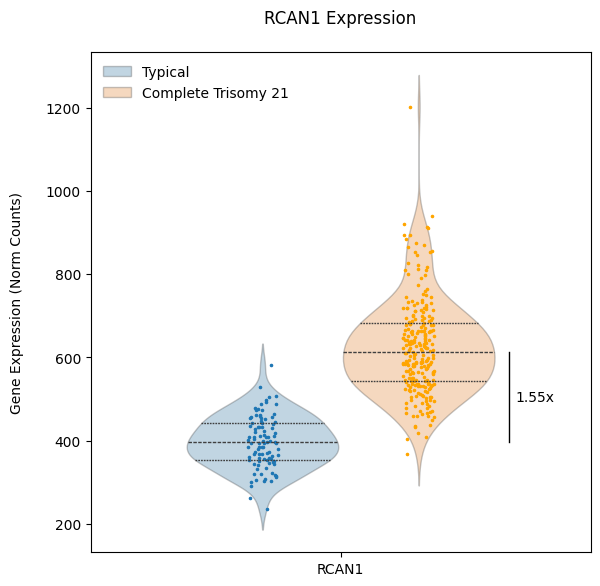

In [5]:
############ Functions ##########
def get_stats(df, col, gene):
    stats_dict={}
    df_grouped = df.groupby((col),observed=False)
    for num, (name, group) in enumerate(df_grouped):
        count = len(group[gene])
        mean = np.mean(group[gene])
        median = np.median(group[gene])
        fq = np.quantile(group[gene], 0.25)
        tq = np.quantile(group[gene], 0.75)
        stdev = np.std(group[gene])
        sterr = stdev / np.sqrt(count)
        
        stats = [count, mean, median, fq, tq, stdev, sterr]
        stats_dict[name] = stats
    stats_dict['x'] = stats_dict['Complete Trisomy 21'][2] / stats_dict['Typical'][2]
    stats_dict['midpoint'] = (stats_dict['Complete Trisomy 21'][2] + stats_dict['Typical'][2])/2
    return stats_dict

def asym_violin(df, gene_list, id_list, scatter):
    df_filtered = df[df['complete_trisomy_21'] != 2].copy()   # gets rid of "other" trisomy for the purposes of this plot
    df_filtered['complete_trisomy_21'] = df_filtered['complete_trisomy_21'].replace({0:'Typical', 1:'Complete Trisomy 21'})
    
    for i in np.arange(len(id_list)):
        stats = get_stats(df_filtered, 'complete_trisomy_21', id_list[i])
        the_x = stats['x']
        
        # Set Up Figure
        figureHeight=6
        figureWidth=8

        plt.figure(figsize=(figureWidth,figureHeight),facecolor='white')

        panelHeight=5
        panelWidth=5

        relativePanelWidth=panelWidth/figureWidth
        relativePanelHeight=panelHeight/figureHeight

        panel1=plt.axes([1.5/figureWidth,0.5/figureHeight,relativePanelWidth,relativePanelHeight])
             
        df_filtered[gene_list[i]] = i
        if scatter:
            sns.violinplot(data=df_filtered, split=True, y=id_list[i], hue='complete_trisomy_21', x=gene_list[i], ax=panel1, linewidth=1, width=0.5, inner='quart', gap=0.03, alpha =0.3)
            df_grouped = df.groupby(('complete_trisomy_21'),observed=False)
            for num, (name, group) in enumerate(df_grouped):
                if name == 0:
                    random_x_floats = np.random.uniform(-0.12,-0.07,len(group[id_list[i]]))
                    group.reset_index(inplace=True)
                    panel1.scatter(random_x_floats, group[id_list[i]], marker='o',s=2.5)
                elif name == 1:
                    random_x_floats = np.random.uniform(0.1,0.15,len(group[id_list[i]]))
                    group.reset_index(inplace=True)
                    panel1.scatter(random_x_floats, group[id_list[i]], marker='o', s=2.5, color='orange')
                else:
                    pass
        
        else: 
            sns.violinplot(data=df_filtered, split=True, y=id_list[i], hue='complete_trisomy_21', x=gene_list[i], ax=panel1, linewidth=1, width=0.5, inner='quart', gap=0.03, alpha =1)
        sns.move_legend(panel1, 'upper left', ncol=1, title=None, frameon=False)
        
        panel1.plot([i+0.27,i+0.27],[stats['Typical'][2],stats['Complete Trisomy 21'][2]], color='black', linewidth=1)
        
        # panel1.plot([i+0.29,i+0.3],[stats['Complete Trisomy 21'][2],stats['Complete Trisomy 21'][2]], color='black', linewidth=1)
        # panel1.plot([i+0.29,i+0.3],[stats['Typical'][2],stats['Typical'][2]], color='black', linewidth=1)
        
        plt.text(i+0.28, stats['midpoint'],f'{the_x:.2f}x',fontsize='medium', va='center',ha='left')
        
        panel1.set_xticks([i])
        panel1.set_xticklabels([gene_list[i]])
        
        panel1.set_xlabel('')
        panel1.set_ylabel('Gene Expression (Norm Counts)\n')
        
        panel1.set_xlim(i-0.4,i+0.4)
        # panel1.set_ylim(-0.4,max_y+5)
    
        panel1.set_title(f'{gene_list[i]} Expression\n')
        # plt.show()
        plt.savefig(f'{gene_list[i]}_asym_violin.png',dpi=600)
        # plt.close()
        # print(f'{comorbid} plot completed')

def sym_violins(df, gene_list, id_list, scatter):
    df_filtered = df[df['complete_trisomy_21'] != 2].copy()   # gets rid of "other" trisomy for the purposes of this plot
    df_filtered['complete_trisomy_21'] = df_filtered['complete_trisomy_21'].replace({0:'Typical', 1:'Complete Trisomy 21'})
    
    for i in np.arange(len(id_list)):
        stats = get_stats(df_filtered, 'complete_trisomy_21', id_list[i])
        the_x = stats['x']
        
        # Set Up Figure
        figureHeight=6
        figureWidth=8

        plt.figure(figsize=(figureWidth,figureHeight),facecolor='white')

        panelHeight=5
        panelWidth=5

        relativePanelWidth=panelWidth/figureWidth
        relativePanelHeight=panelHeight/figureHeight

        panel1=plt.axes([1.5/figureWidth,0.5/figureHeight,relativePanelWidth,relativePanelHeight])
             
        df_filtered[gene_list[i]] = i
        
        if scatter:
            sns.violinplot(data=df_filtered, split=False, y=id_list[i], hue='complete_trisomy_21', x=gene_list[i], ax=panel1, linewidth=1, width=0.5, inner='quart', gap=0.03, alpha=0.3)
            df_grouped = df.groupby(('complete_trisomy_21'),observed=False)
            for num, (name, group) in enumerate(df_grouped):
            #     x_labels.append(name)
            #     x_labels_pos.append(num*2)
                if name == 0:
                    random_x_floats = np.random.uniform(-0.15,-0.1,len(group[id_list[i]]))
                    group.reset_index(inplace=True)
                    panel1.scatter(random_x_floats, group[id_list[i]], marker='o',s=2.5)
                elif name == 1:
                    random_x_floats = np.random.uniform(0.1,0.15,len(group[id_list[i]]))
                    group.reset_index(inplace=True)
                    panel1.scatter(random_x_floats, group[id_list[i]], marker='o', s=2.5, color='orange')
                else:
                    pass
        else:
            sns.violinplot(data=df_filtered, split=False, y=id_list[i], hue='complete_trisomy_21', x=gene_list[i], ax=panel1, linewidth=1, width=0.5, inner='quart', gap=0.03, alpha=1)
        
        
        
        sns.move_legend(panel1, 'upper left', ncol=1, title=None, frameon=False)
        
        panel1.plot([i+0.27,i+0.27],[stats['Typical'][2],stats['Complete Trisomy 21'][2]], color='black', linewidth=1)
        
        # panel1.plot([i+0.29,i+0.3],[stats['Complete Trisomy 21'][2],stats['Complete Trisomy 21'][2]], color='black', linewidth=1)
        # panel1.plot([i+0.29,i+0.3],[stats['Typical'][2],stats['Typical'][2]], color='black', linewidth=1)
        
        plt.text(i+0.28, stats['midpoint'],f'{the_x:.2f}x',fontsize='medium', va='center',ha='left')
        
        panel1.set_xticks([i])
        panel1.set_xticklabels([gene_list[i]])
        
        panel1.set_xlabel('')
        panel1.set_ylabel('Gene Expression (Norm Counts)\n')
        
        panel1.set_xlim(i-0.4,i+0.4)
        # panel1.set_ylim(-0.4,max_y+5)
    
        panel1.set_title(f'{gene_list[i]} Expression\n')
        # plt.show()
        plt.savefig(f'{gene_list[i]}_sym_violins.png',dpi=600)
        # plt.close()
        # print(f'{comorbid} plot completed')
    

def get_gene_ids(gene_list, df, id_col, name_col):
    output=[]
    for gene in gene_list:
        result = df.loc[df[name_col] == gene]
        output.append(result[id_col].values[0])
    return output

############ Main ################
target_genes = ['RCAN1']

#gets list of genes
gene_ids = get_gene_ids(target_genes, gene_ref, 'gene_id', 'gene_name')

#merges comorbid on expression data (thats filtered to only the genes and patient id cols)
cols = ['Patient'] + gene_ids
merged_df = pd.merge(expression_data[cols], phenotype_data, on='Patient', how='left')

other_list = ['mosaic_trisomy_21', 'mosaic_translocation_Down_syndrome', 'Down_syndrome', 'translocation_Down_syndrome']
for i in other_list:
    merged_df.loc[merged_df[i] == 1, 'complete_trisomy_21'] = 2  #ok so this basically labels all "other" down syndrome types as 2 so they can group sepparately!

    
asym_violin(merged_df, target_genes, gene_ids, scatter=True)

sym_violins(merged_df, target_genes, gene_ids, scatter=True)

#################################